Dataset Shape: (200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


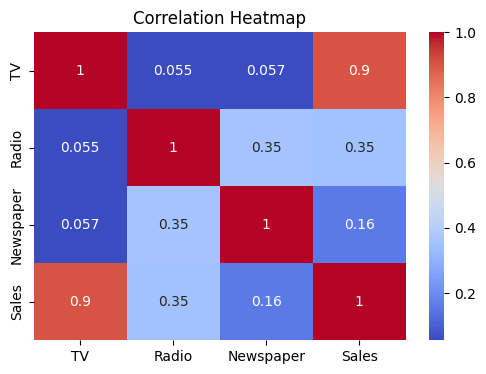


Model Coefficients: [0.05450927 0.10094536 0.00433665]
Model Intercept: 4.714126402214127
R² Score: 0.9059011844150826
RMSE: 1.7052146229349223


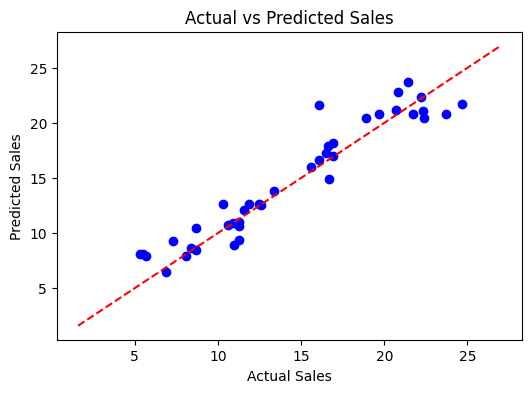

In [3]:
# SALES PREDICTION USING PYTHON

# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
df = pd.read_csv("/content/sample_data/advertising.csv")
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Define features & target
X = df[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = df['Sales']  # Target variable

# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate Model
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Step 10: Visualization - Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()
